In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [ ]:
# df- training data
#test - test data

In [ ]:
df=pd.read_excel('/content/Drive/My Drive/Application of ML in industries/Lab4/AirQualityUCI.xlsx',parse_dates=[['Date', 'Time']])
df.head()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
df.columns

Index(['Date_Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

Checking for Null values in the dataset

In [ ]:
df.isnull().sum()

Date_Time        0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

Checking the shape of dataset

In [ ]:
df.shape

(9357, 14)

15 attributes and approx 9.5k entries which is quite a lot

Getting a 

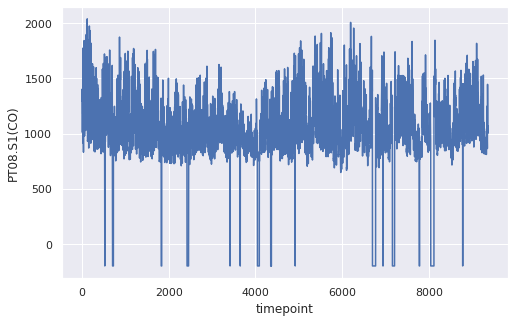

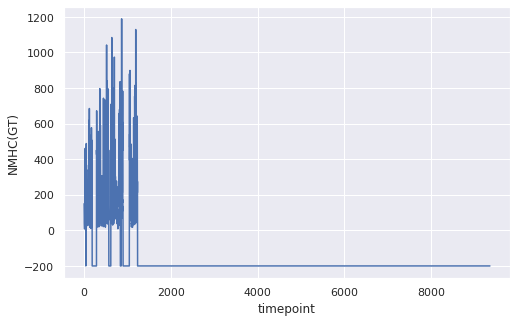

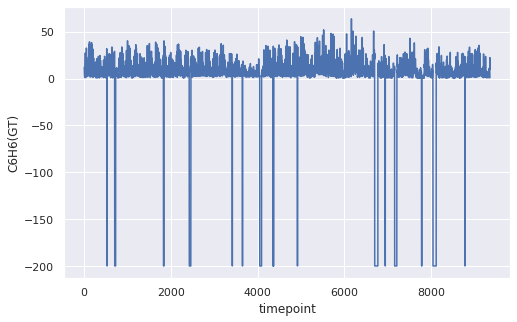

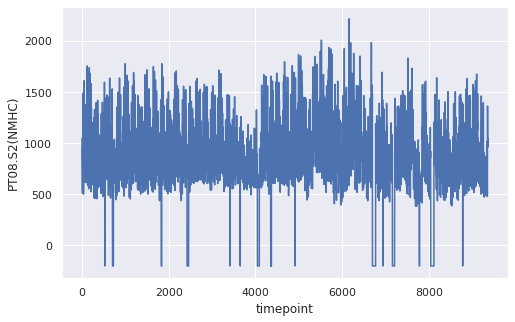

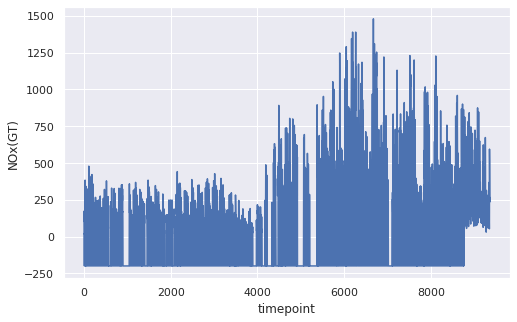

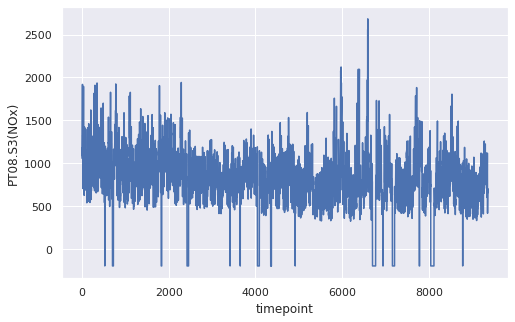

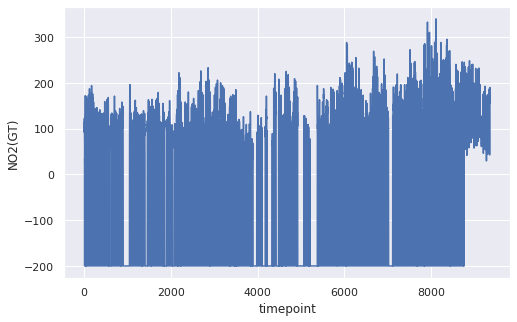

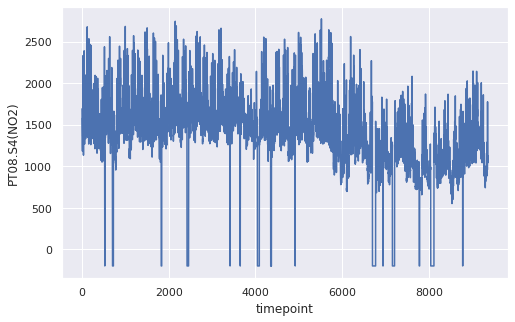

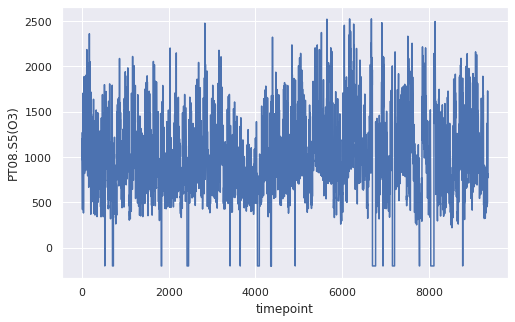

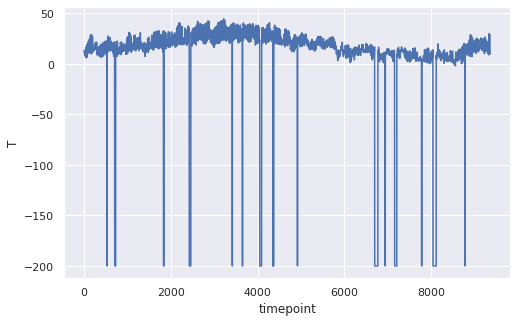

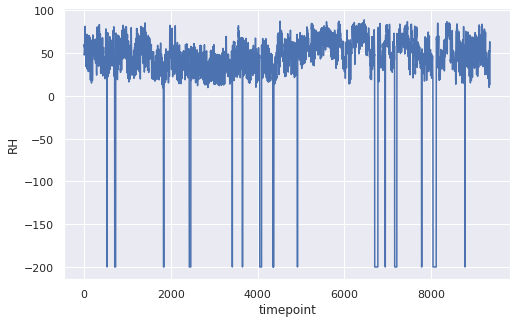

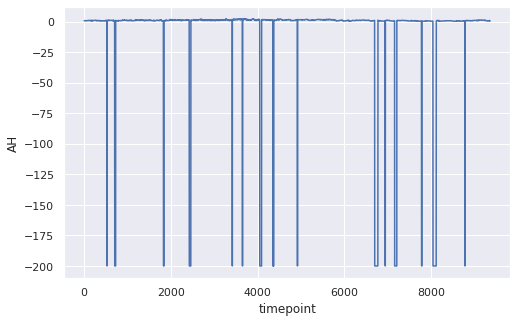

In [ ]:
for col in df.columns[2:]:
  plt.figure(figsize=(8,5))
  sns.set(style='darkgrid')
  plt.xlabel('timepoint')
  plt.ylabel(col)
  sns.lineplot(data=df[col])
  plt.show()

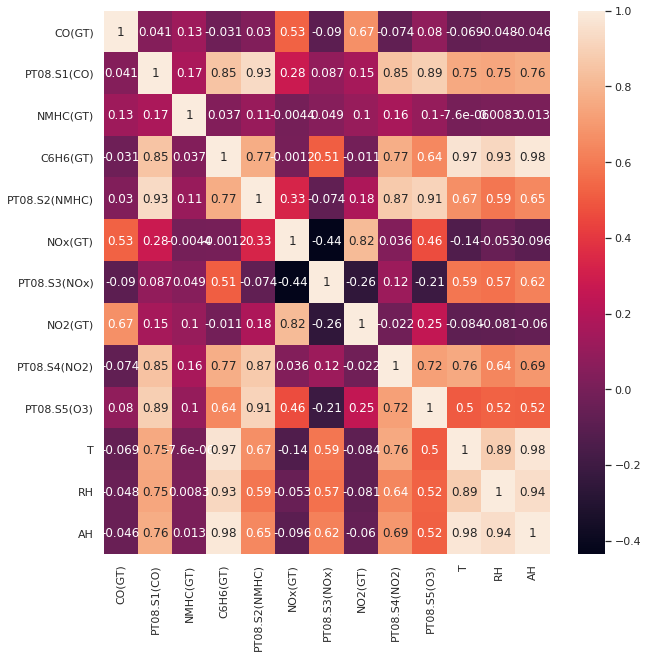

In [ ]:
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)



```
# This is formatted as code
```

# Getting Statistical analysis of the data

In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_Time      9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   int64         
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1023.5 KB


mean and std is varing much in columns
Need to normalize, standardize the data

and min reading is -200, which is not possible 
After going thorugh the data I got to know all the unknown values have been represented as -200, therefore have to handle that too



In [ ]:
df['Date_Time'] = pd.to_datetime(df.Date_Time , format = '%d/%m/%Y %H.%M.%S')
data = df.drop(['Date_Time'], axis=1)
data.index = df.Date_Time

#missing value treatment, & checking stationarity



In [ ]:

cols = data.columns
for j in cols:
    for i in range(0,len(data)):
       if data[j][i] == -200:
           data[j][i] = data[j][i-1]

from statsmodels.tsa.vector_ar.vecm import coint_johansen

johan_test_temp = data.drop([ 'CO(GT)'], axis=1)
coint_johansen(johan_test_temp,-1,1).eig

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([1.75628733e-01, 1.52399674e-01, 1.15090998e-01, 1.04309966e-01,
       9.29562919e-02, 6.90255307e-02, 5.76654697e-02, 3.43596700e-02,
       3.06350634e-02, 1.18801270e-02, 2.46819409e-03, 7.09473977e-05])

#creating the train and validation set 

#& building model

In [ ]:

train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]


from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


#Viewing the prediction matrix

In [ ]:
prediction

array([[8.88161065e-01, 8.41803964e+02, 2.71644320e+02, ...,
        1.05743863e+01, 3.48713152e+01, 4.37277520e-01],
       [9.92424381e-01, 8.66262441e+02, 2.69327633e+02, ...,
        9.85432359e+00, 3.74025472e+01, 4.42645045e-01],
       [1.10490663e+00, 8.90900736e+02, 2.67743663e+02, ...,
        9.24271941e+00, 3.96241504e+01, 4.47398014e-01],
       ...,
       [2.13383727e+00, 1.10685527e+03, 2.69411125e+02, ...,
        2.01829088e+01, 4.88992477e+01, 1.11131218e+00],
       [2.13383726e+00, 1.10685527e+03, 2.69411126e+02, ...,
        2.01829090e+01, 4.88992475e+01, 1.11131220e+00],
       [2.13383724e+00, 1.10685527e+03, 2.69411126e+02, ...,
        2.01829093e+01, 4.88992474e+01, 1.11131221e+00]])

#converting predictions to dataframe
#& check rmse

In [ ]:

pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

for i in cols:
    print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[[i]], valid[i])))


rmse value for CO(GT) is :  1.4086965424458155
rmse value for PT08.S1(CO) is :  205.9103763377936
rmse value for NMHC(GT) is :  6.670741427631468
rmse value for C6H6(GT) is :  7.130304477787713
rmse value for PT08.S2(NMHC) is :  277.85628373099973
rmse value for NOx(GT) is :  214.75793797687908
rmse value for PT08.S3(NOx) is :  244.96129928948875
rmse value for NO2(GT) is :  66.65226538129373
rmse value for PT08.S4(NO2) is :  490.0528665285984
rmse value for PT08.S5(O3) is :  446.5049918901976
rmse value for T is :  10.722429361262098
rmse value for RH is :  17.11484863483318
rmse value for AH is :  0.5216105887693505


#printing predictions

In [ ]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[2.34562472e+00 1.08604049e+03 2.80752383e+02 1.24358835e+01
  1.05542000e+03 2.81217778e+02 6.59528135e+02 1.68188388e+02
  1.15845997e+03 8.50834322e+02 2.73623551e+01 1.55617864e+01
  5.15356506e-01]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
